# Explorations todo:

* Distributions: O, H, L, C, V + returns for every value individually

* Correlations
    * Daily returns
    * Open(n) with Close(t-n) for n = 0, 1, 2, 3 ...

* ...

# Imports

In [244]:
%load_ext autoreload
%autoreload 2

# Pandas and numpy
import pandas as pd
import numpy as np

# Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('darkgrid')
%matplotlib inline

# Alpaca API
import alpaca_trade_api as tradeapi

# Pickle
import pickle
import os

# To load variables from .env file into system environment
from dotenv import find_dotenv, load_dotenv

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [246]:
from src.visualization.visualize import plot_corr_matrix, plot_multi, plot_norm_dist

In [10]:
# Load environment variables
load_dotenv(find_dotenv())

True

In [11]:
# Load dataset from pickle file
data_base_dir = os.environ.get('DATA_DIR_BASE_PATH')
fname = data_base_dir + '/processed/djia_cleaned_2019-12-11.pkl'
djia = pickle.load(open(fname, 'rb'))

In [12]:
djia['DJIA']

,Open,High,Low,Close,Volume
Epoch,,,,,
2014-12-04 00:00:00+00:00,17910.019531,17937.960938,17814.810547,17900.099609,76270000
2014-12-05 00:00:00+00:00,17903.050781,17991.189453,17903.050781,17958.789062,79110000
2014-12-08 00:00:00+00:00,17954.939453,17960.560547,17804.279297,17852.480469,88680000
2014-12-09 00:00:00+00:00,17847.369141,17847.369141,17629.570312,17801.199219,100400000
2014-12-10 00:00:00+00:00,17797.990234,17797.990234,17508.099609,17533.150391,115100000
...,...,...,...,...,...
2019-11-27 00:00:00+00:00,28156.470703,28174.970703,28075.230469,28164.000000,198210000
2019-11-29 00:00:00+00:00,28103.160156,28119.509766,28042.529297,28051.410156,120630000
2019-12-02 00:00:00+00:00,28109.740234,28109.839844,27782.349609,27783.039062,236610000


,,Open
VZ,Open,0.322620
WMT,Open,0.340654
PG,Open,0.350893
KO,Open,0.360891
WBA,Open,0.395787
MRK,Open,0.416091
PFE,Open,0.416740
JNJ,Open,0.420389
MCD,Open,0.423430
NKE,Open,0.440856


//anaconda3/envs/capstone_nf/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

//anaconda3/envs/capstone_nf/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



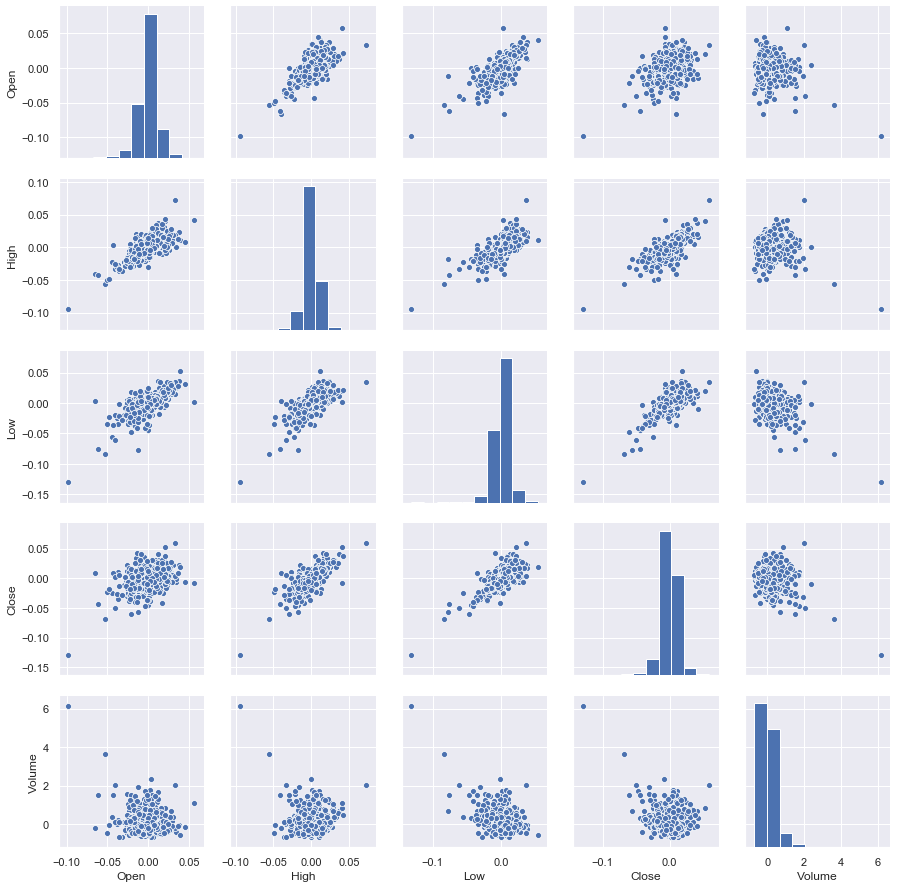

In [72]:
sns.pairplot(djia['MMM'].pct_change())

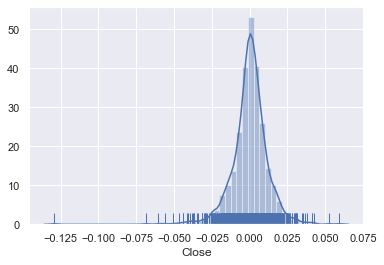

In [73]:
sns.distplot((djia['MMM']['Close']).pct_change().dropna(), rug=True, bins=50)

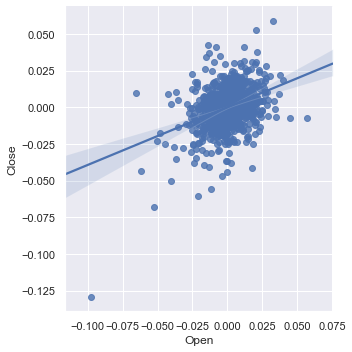

In [74]:
sns.lmplot('Open', 'Close', djia['MMM'].pct_change().dropna(), )

In [85]:
djia.columns.get_level_values(0).unique()

Index(['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'DOW', 'GS', 'HD',
       'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE',
       'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'V', 'VZ', 'WBA', 'WMT', 'DJIA'],
      dtype='object')

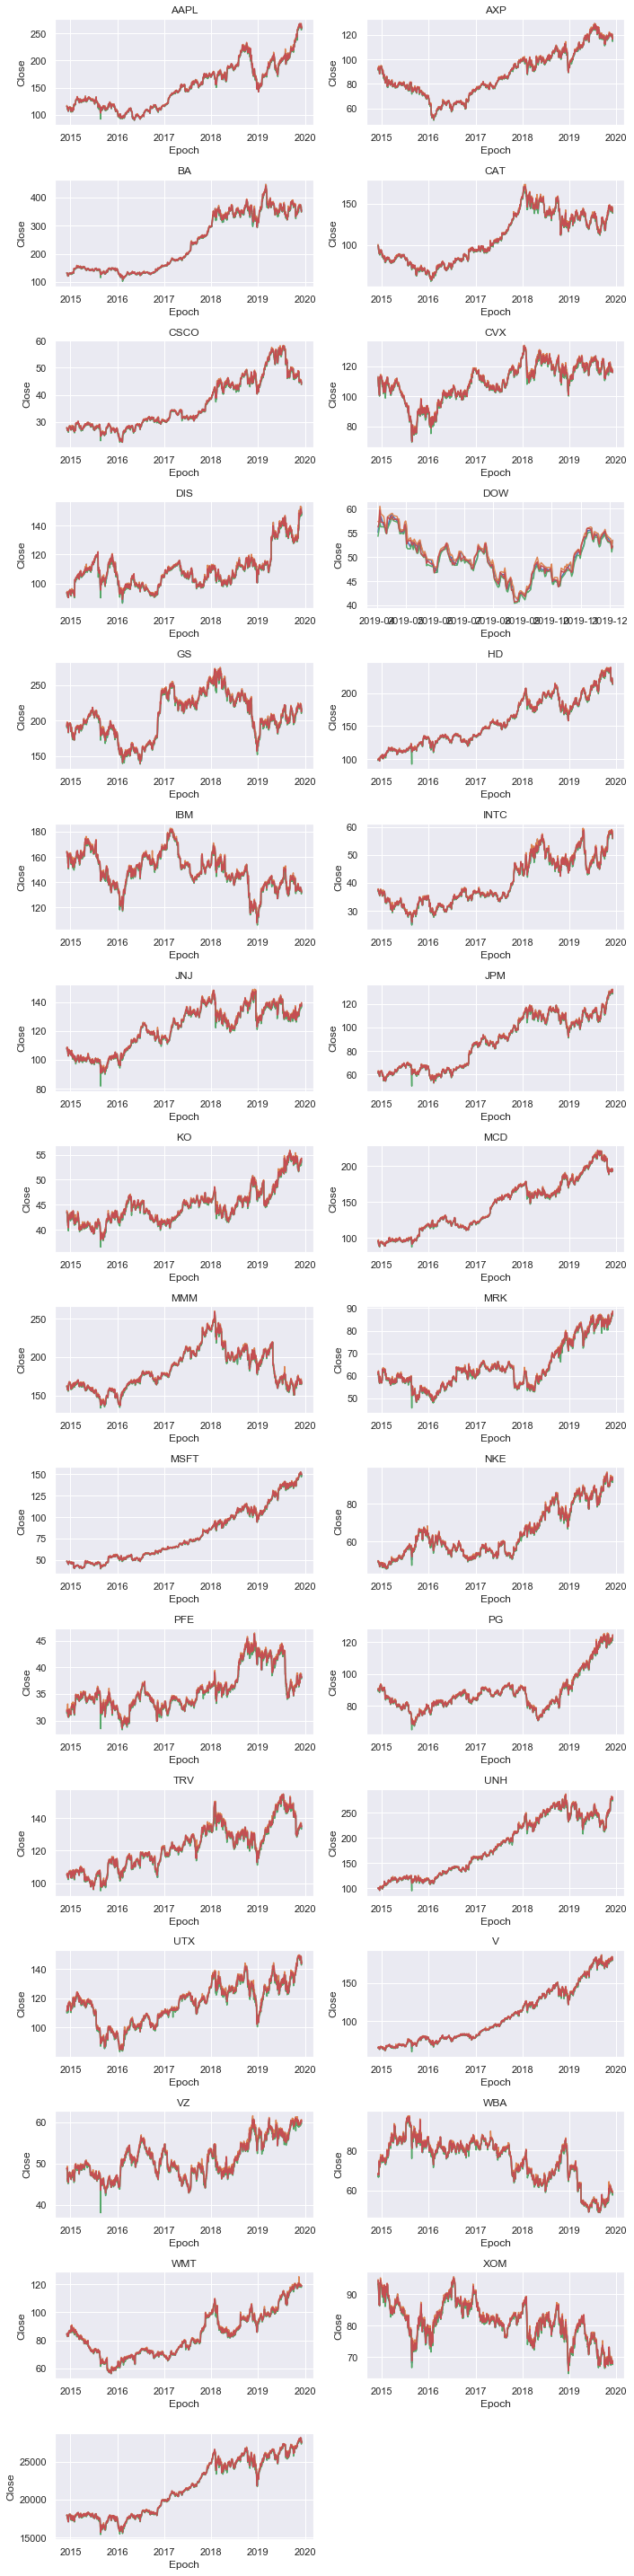

In [87]:
plot_multi(djia, ncols=2)

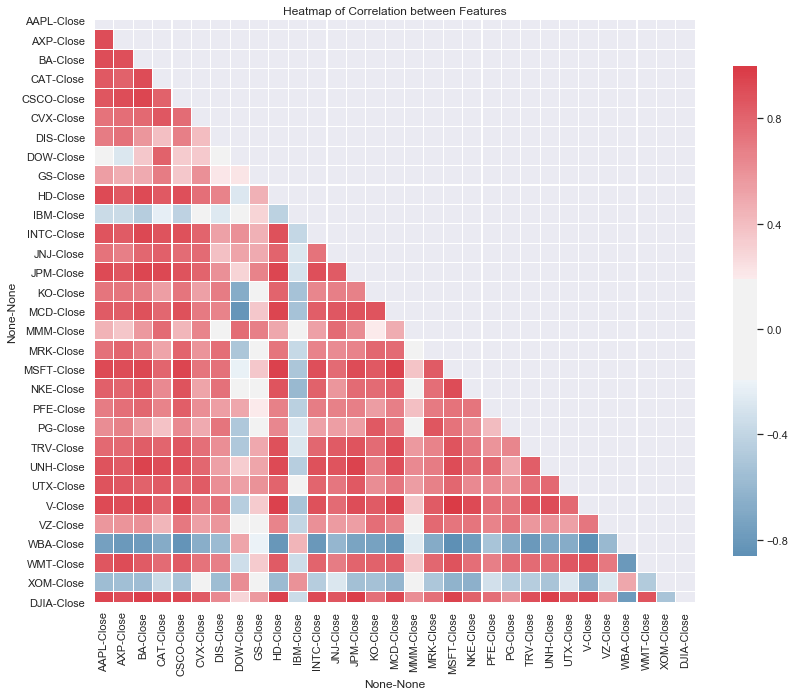

In [109]:
corr = djia.iloc[:, djia.columns.get_level_values(1) == 'Close'].corr()

plot_corr_matrix(corr)

In [88]:
djia.iloc[:, djia.columns.get_level_values(1) == 'Close'].corr()['DJIA'].sort_values('Close')

,,Close
WBA,Close,-0.787492
XOM,Close,-0.508152
IBM,Close,-0.353579
DOW,Close,0.291079
GS,Close,0.568491
MMM,Close,0.609988
PG,Close,0.618359
VZ,Close,0.627519
DIS,Close,0.635975
MRK,Close,0.747974


In [90]:
ibm = djia['IBM'].copy()

In [91]:
# Calculate 

In [92]:
# 'year', 'month', 'day', 'dayofweek', 'dayssince last trading day', 'days until next trading day'

ibm['year'] = ibm.index.year
ibm['month'] = ibm.index.month
ibm['date'] = ibm.index.day
ibm['weekday'] = ibm.index.dayofweek

In [93]:
ibm.index.day

Int64Index([ 4,  5,  8,  9, 10, 11, 12, 15, 16, 17,
            ...
            20, 21, 22, 25, 26, 27, 29,  2,  3,  4],
           dtype='int64', name='Epoch', length=1259)

In [94]:
ibm.index[1] -ibm.index[2] 

Timedelta('-3 days +00:00:00')

In [95]:
ibm['days_since'] = (ibm.index - ibm.index.shift(1, freq=pd.Timedelta(1, 'D')))

In [96]:
ibm['days_since'].value_counts()

-1 days    1259
Name: days_since, dtype: int64

In [97]:
first = ibm.index

In [98]:
second = ibm.index.shift(1, freq=pd.Timedelta(1, 'D'))

In [99]:
first - second

TimedeltaIndex(['-1 days', '-1 days', '-1 days', '-1 days', '-1 days',
                '-1 days', '-1 days', '-1 days', '-1 days', '-1 days',
                ...
                '-1 days', '-1 days', '-1 days', '-1 days', '-1 days',
                '-1 days', '-1 days', '-1 days', '-1 days', '-1 days'],
               dtype='timedelta64[ns]', name='Epoch', length=1259, freq=None)

In [100]:
ibm['first'] = first
ibm['second'] = second

In [101]:
ibm.head()

,Open,High,Low,Close,Volume,year,month,date,weekday,days_since,first,second
Epoch,,,,,,,,,,,,
2014-12-04 00:00:00+00:00,164.009995,164.500000,163.009995,164.050003,3859400,2014,12,4,3,-1 days,2014-12-04 00:00:00+00:00,2014-12-05 00:00:00+00:00
2014-12-05 00:00:00+00:00,163.610001,164.500000,162.910004,163.270004,3013500,2014,12,5,4,-1 days,2014-12-05 00:00:00+00:00,2014-12-06 00:00:00+00:00
2014-12-08 00:00:00+00:00,163.289993,163.289993,161.539993,161.860001,2851000,2014,12,8,0,-1 days,2014-12-08 00:00:00+00:00,2014-12-09 00:00:00+00:00
2014-12-09 00:00:00+00:00,160.839996,163.020004,160.800003,162.990005,3861200,2014,12,9,1,-1 days,2014-12-09 00:00:00+00:00,2014-12-10 00:00:00+00:00
2014-12-10 00:00:00+00:00,163.009995,163.330002,160.029999,160.509995,4072800,2014,12,10,2,-1 days,2014-12-10 00:00:00+00:00,2014-12-11 00:00:00+00:00


In [102]:
ibm['days_until'] = (ibm['second'] - ibm['second'].shift(1))
ibm['days_until'] = [int(abs(x.days)) for x in ibm['days_until'].fillna(0)]

ibm['days_since'] = (ibm['second'] - ibm['second'].shift(-1))
ibm['days_since'] = [int(abs(x.days)) for x in ibm['days_since'].fillna(0)]

//anaconda3/envs/capstone_nf/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.

//anaconda3/envs/capstone_nf/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:

Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.



In [103]:
ibm.tail(10)

,Open,High,Low,Close,Volume,year,month,date,weekday,days_since,first,second,days_until
Epoch,,,,,,,,,,,,,
2019-11-20 00:00:00+00:00,134.059998,134.460007,132.750000,133.199997,4140148,2019,11,20,2,1,2019-11-20 00:00:00+00:00,2019-11-21 00:00:00+00:00,1
2019-11-21 00:00:00+00:00,133.399994,134.169998,132.979996,133.839996,3345343,2019,11,21,3,1,2019-11-21 00:00:00+00:00,2019-11-22 00:00:00+00:00,1
2019-11-22 00:00:00+00:00,134.190002,134.649994,133.589996,134.339996,3297797,2019,11,22,4,3,2019-11-22 00:00:00+00:00,2019-11-23 00:00:00+00:00,1
2019-11-25 00:00:00+00:00,134.470001,136.000000,134.350006,135.970001,2590170,2019,11,25,0,1,2019-11-25 00:00:00+00:00,2019-11-26 00:00:00+00:00,3
2019-11-26 00:00:00+00:00,136.149994,136.149994,134.770004,135.089996,3793337,2019,11,26,1,1,2019-11-26 00:00:00+00:00,2019-11-27 00:00:00+00:00,1
2019-11-27 00:00:00+00:00,135.350006,135.710007,133.619995,133.770004,3282827,2019,11,27,2,2,2019-11-27 00:00:00+00:00,2019-11-28 00:00:00+00:00,1
2019-11-29 00:00:00+00:00,133.600006,134.520004,133.029999,134.449997,1825255,2019,11,29,4,3,2019-11-29 00:00:00+00:00,2019-11-30 00:00:00+00:00,2
2019-12-02 00:00:00+00:00,134.449997,134.500000,132.479996,132.910004,3067831,2019,12,2,0,1,2019-12-02 00:00:00+00:00,2019-12-03 00:00:00+00:00,3
2019-12-03 00:00:00+00:00,132.000000,132.440002,130.690002,132.119995,3711071,2019,12,3,1,1,2019-12-03 00:00:00+00:00,2019-12-04 00:00:00+00:00,1


In [104]:
ibm.drop(['first', 'second'], axis=1, inplace=True)

In [105]:
ibm.head()

,Open,High,Low,Close,Volume,year,month,date,weekday,days_since,days_until
Epoch,,,,,,,,,,,
2014-12-04 00:00:00+00:00,164.009995,164.500000,163.009995,164.050003,3859400,2014,12,4,3,1,0
2014-12-05 00:00:00+00:00,163.610001,164.500000,162.910004,163.270004,3013500,2014,12,5,4,3,1
2014-12-08 00:00:00+00:00,163.289993,163.289993,161.539993,161.860001,2851000,2014,12,8,0,1,3
2014-12-09 00:00:00+00:00,160.839996,163.020004,160.800003,162.990005,3861200,2014,12,9,1,1,1
2014-12-10 00:00:00+00:00,163.009995,163.330002,160.029999,160.509995,4072800,2014,12,10,2,1,1


In [106]:
n = 5
for i in range(1, n+1):
    ibm['ret_'+str(i)] = ibm['Close'].pct_change(i)

In [107]:
ibm.tail(20)

,Open,High,Low,Close,Volume,year,month,date,weekday,days_since,days_until,ret_1,ret_2,ret_3,ret_4,ret_5
Epoch,,,,,,,,,,,,,,,,
2019-11-06 00:00:00+00:00,138.000000,138.779999,137.550003,138.779999,4477291,2019,11,6,2,1,1,0.006454,0.008063,0.023980,0.037763,0.026100
2019-11-07 00:00:00+00:00,137.869995,139.139999,137.580002,137.690002,4073908,2019,11,7,3,1,1,-0.007854,-0.001450,0.000145,0.015937,0.029612
2019-11-08 00:00:00+00:00,137.580002,137.610001,136.160004,137.610001,2278602,2019,11,8,4,3,1,-0.000581,-0.008431,-0.002031,-0.000436,0.015347
2019-11-11 00:00:00+00:00,137.199997,137.199997,135.000000,135.470001,2568755,2019,11,11,0,1,3,-0.015551,-0.016123,-0.023851,-0.017550,-0.015980
2019-11-12 00:00:00+00:00,135.869995,136.660004,135.020004,135.589996,3046536,2019,11,12,1,1,1,0.000886,-0.014679,-0.015252,-0.022986,-0.016680
2019-11-13 00:00:00+00:00,135.389999,135.580002,133.850006,134.479996,3060924,2019,11,13,2,1,1,-0.008186,-0.007308,-0.022745,-0.023313,-0.030984
2019-11-14 00:00:00+00:00,134.130005,134.330002,133.330002,134.000000,4231471,2019,11,14,3,1,1,-0.003569,-0.011726,-0.010851,-0.026234,-0.026799
2019-11-15 00:00:00+00:00,134.389999,135.119995,134.029999,134.399994,3262656,2019,11,15,4,3,1,0.002985,-0.000595,-0.008776,-0.007899,-0.023327
2019-11-18 00:00:00+00:00,134.300003,134.479996,133.229996,134.309998,3210872,2019,11,18,0,1,3,-0.000670,0.002313,-0.001264,-0.009440,-0.008563


//anaconda3/envs/capstone_nf/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

//anaconda3/envs/capstone_nf/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



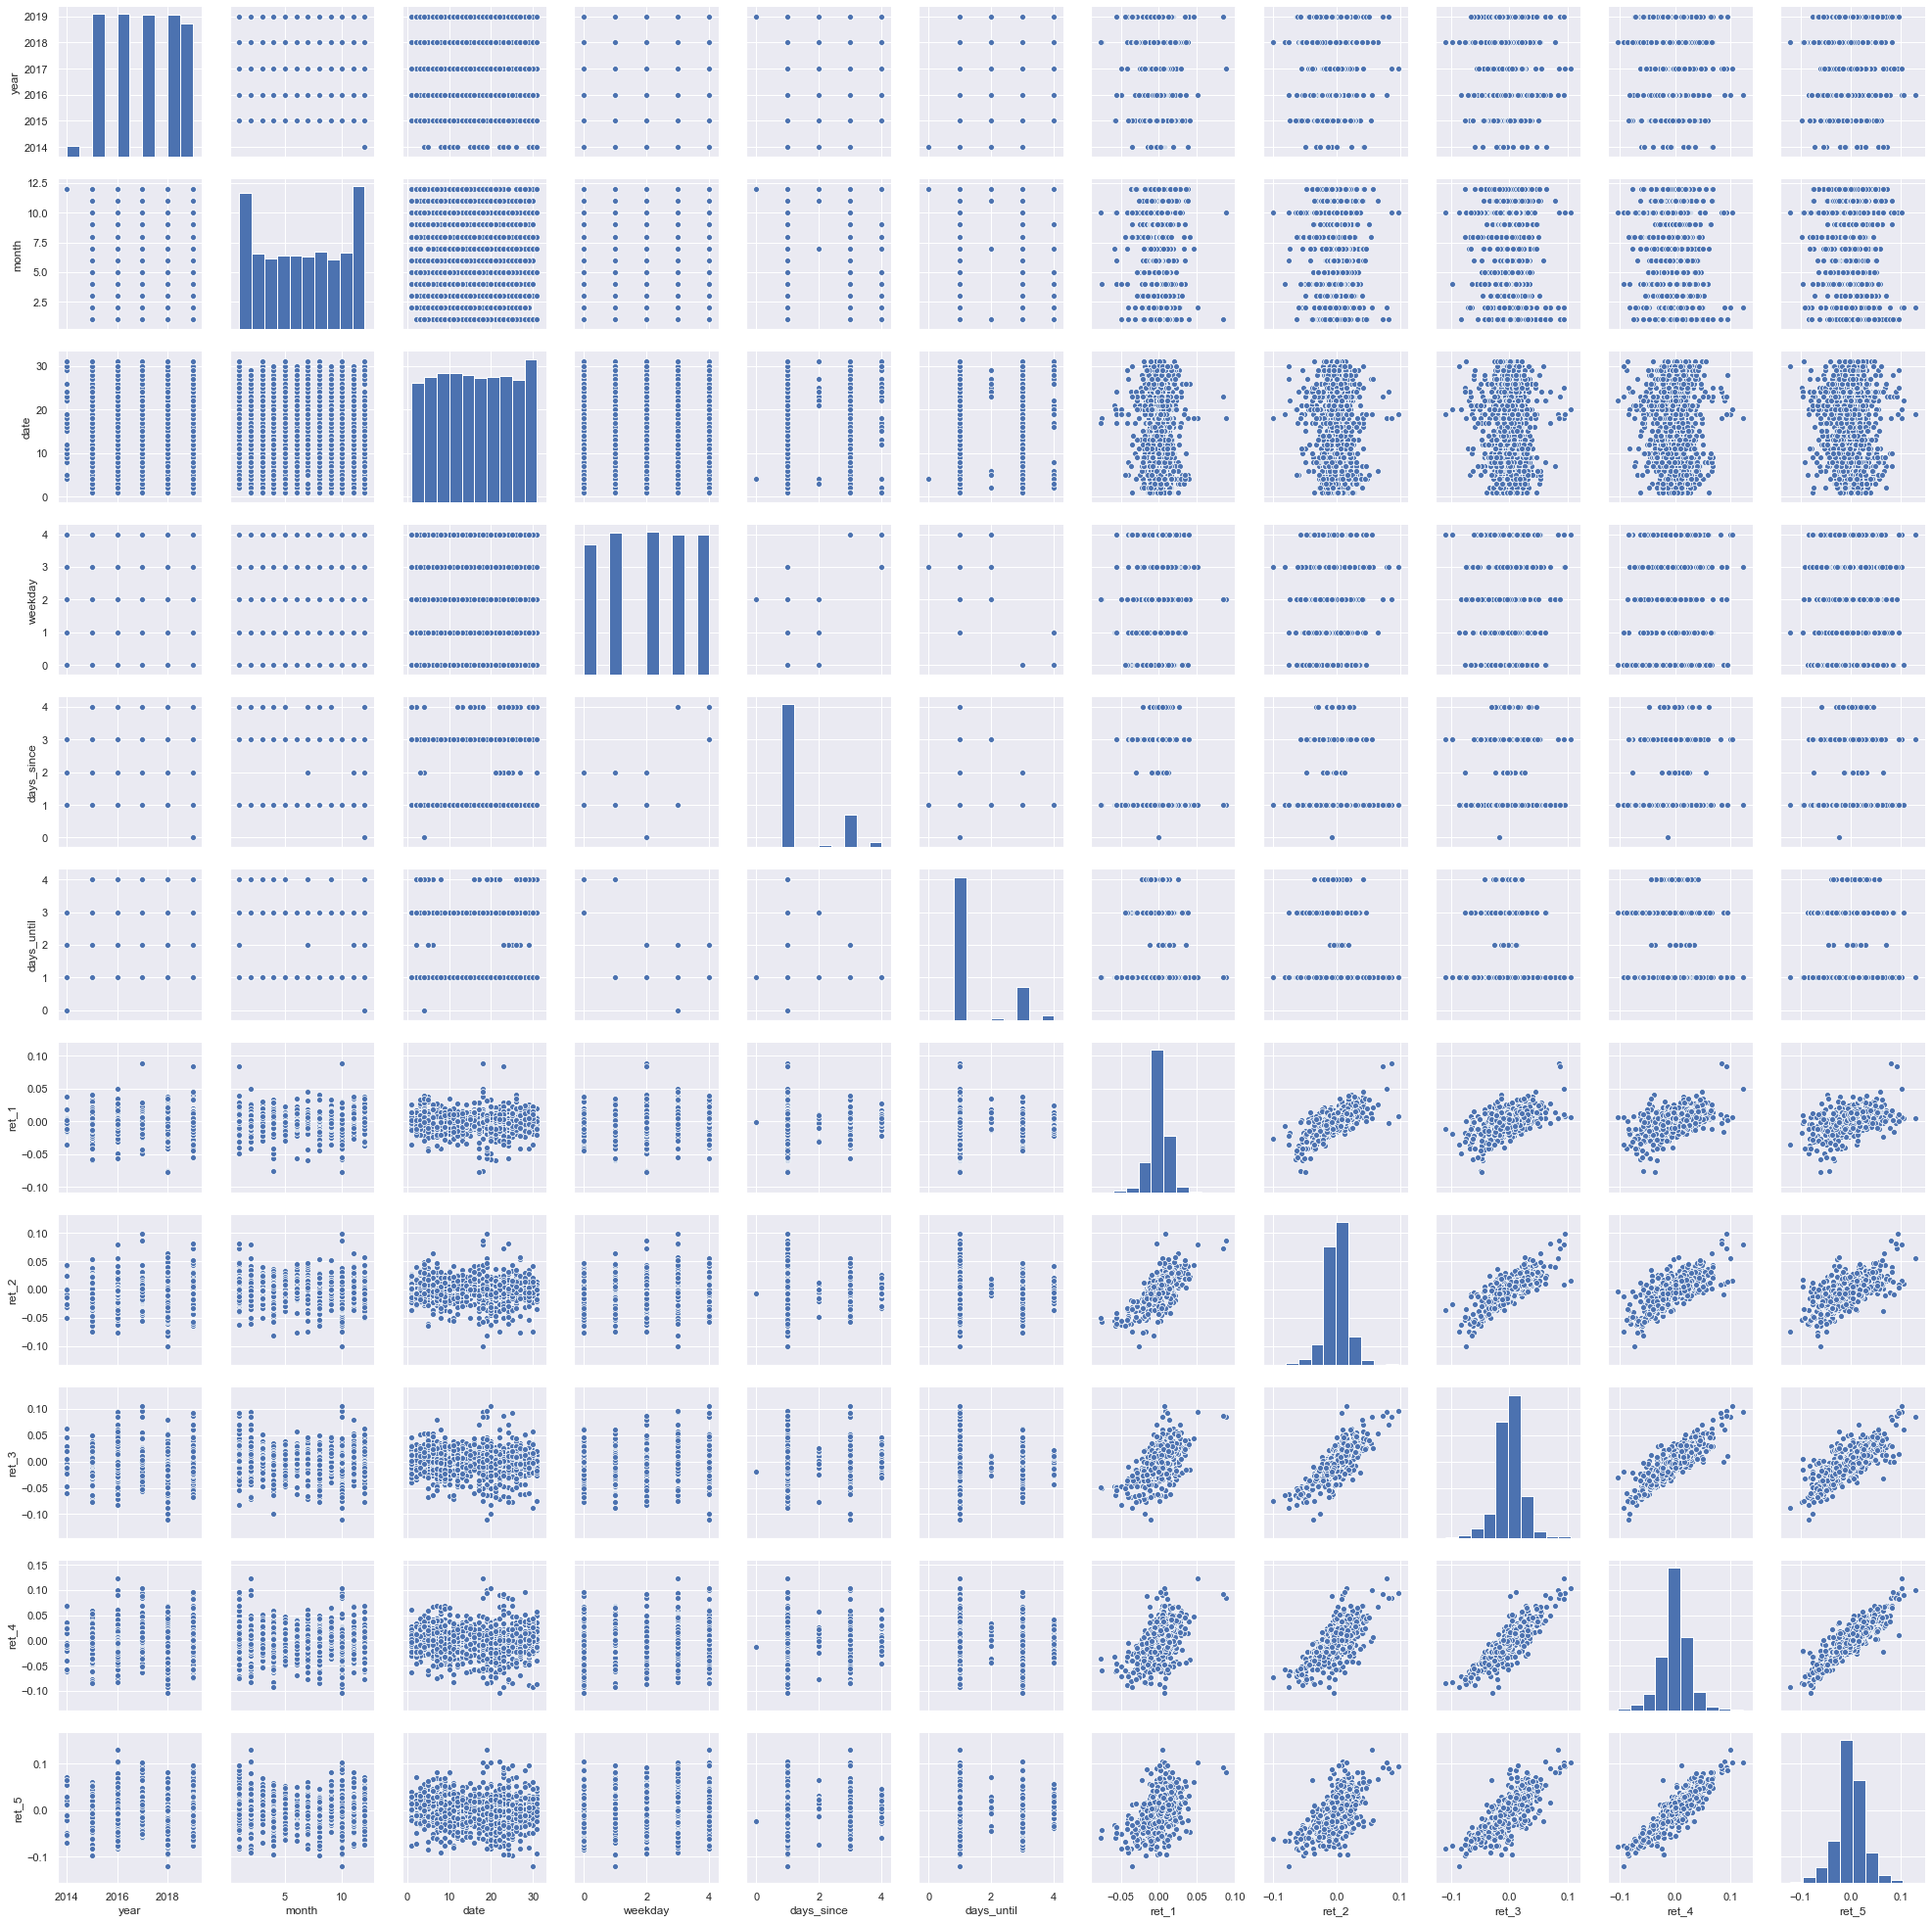

In [112]:
ibm_reduced = ibm.copy().drop(['Open', 'High', 'Low', 'Volume', 'Close'], axis=1)

sns.pairplot(ibm_reduced)

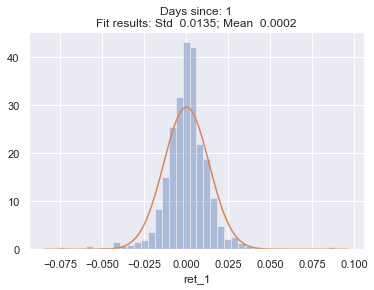

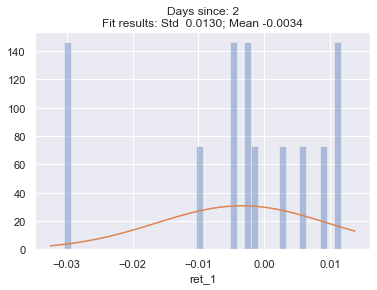

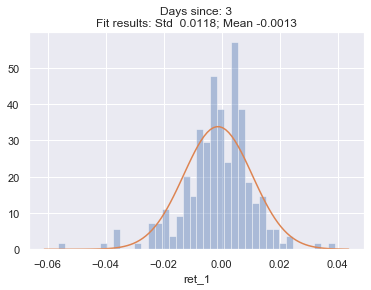

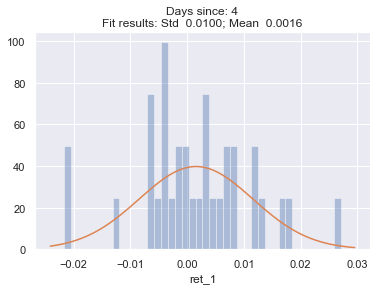

In [258]:
for i in range(ibm_reduced['days_since'].min()+1, ibm_reduced['days_since'].max()+1):
    data = ibm_reduced[ibm_reduced['days_since'] == i]['ret_1'].fillna(0)
    plot_norm_dist(data, i)
    plt.show()